# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | kayangel
Processing Record 5 of Set 1 | ebaye
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | flying fish cove
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | pedernales
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 16 of Set 1 | puerto leguizamo
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | magumeri
Processing Record 21 of Set 1 | port-aux-francais
Proce

Processing Record 42 of Set 4 | kulachi
Processing Record 43 of Set 4 | pasil
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | dejen
Processing Record 46 of Set 4 | shakhtinsk
Processing Record 47 of Set 4 | martinsburg
Processing Record 48 of Set 4 | binghamton
Processing Record 49 of Set 4 | saipan
Processing Record 0 of Set 5 | enewetak
Processing Record 1 of Set 5 | taiynsha
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | quellon
Processing Record 4 of Set 5 | tofol
Processing Record 5 of Set 5 | japekrom
City not found. Skipping...
Processing Record 6 of Set 5 | sinabang
Processing Record 7 of Set 5 | hammerfest
Processing Record 8 of Set 5 | kirensk
Processing Record 9 of Set 5 | kimamba
Processing Record 10 of Set 5 | yarumal
Processing Record 11 of Set 5 | port saint john's
Processing Record 12 of Set 5 | campbell river
Processing Record 13 of Set 5 | chornobay
Processing Record 14 of Set 5 | caleta de carquin
Processing Record

Processing Record 34 of Set 8 | wakkanai
Processing Record 35 of Set 8 | bereznik
Processing Record 36 of Set 8 | sarmiento
Processing Record 37 of Set 8 | mount pearl
Processing Record 38 of Set 8 | hede
Processing Record 39 of Set 8 | hami
Processing Record 40 of Set 8 | nicoya
Processing Record 41 of Set 8 | tannum sands
Processing Record 42 of Set 8 | clodomira
Processing Record 43 of Set 8 | betio village
Processing Record 44 of Set 8 | popondetta
Processing Record 45 of Set 8 | morehead city
Processing Record 46 of Set 8 | cannonvale
Processing Record 47 of Set 8 | rundu
Processing Record 48 of Set 8 | howard springs
Processing Record 49 of Set 8 | peto
Processing Record 0 of Set 9 | belaya kholunitsa
Processing Record 1 of Set 9 | athi river
Processing Record 2 of Set 9 | tarakan
Processing Record 3 of Set 9 | crucecita
Processing Record 4 of Set 9 | viedma
Processing Record 5 of Set 9 | dudinka
Processing Record 6 of Set 9 | rudnya
Processing Record 7 of Set 9 | kone
Processing

Processing Record 22 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 23 of Set 12 | susuman
Processing Record 24 of Set 12 | berlin
Processing Record 25 of Set 12 | digapahandi
Processing Record 26 of Set 12 | pea ridge
Processing Record 27 of Set 12 | puerto lempira
Processing Record 28 of Set 12 | burela de cabo
Processing Record 29 of Set 12 | mao
Processing Record 30 of Set 12 | bonnyville
Processing Record 31 of Set 12 | birjand
Processing Record 32 of Set 12 | novokorsunskaya
Processing Record 33 of Set 12 | bulawayo
Processing Record 34 of Set 12 | san fernando
Processing Record 35 of Set 12 | vilyuysk
Processing Record 36 of Set 12 | goure
Processing Record 37 of Set 12 | tobruk
Processing Record 38 of Set 12 | gulf breeze
Processing Record 39 of Set 12 | nagai
Processing Record 40 of Set 12 | dolisie
Processing Record 41 of Set 12 | ternate
Processing Record 42 of Set 12 | andergrove
Processing Record 43 of Set 12 | pasni
Processing Record 44 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,28.88,72,55,8.60,TK,1690254896
1,longyearbyen,78.2186,15.6401,9.91,76,75,4.12,SJ,1690254872
2,san patricio,28.0170,-97.5169,30.10,69,49,5.06,US,1690254885
3,kayangel,8.0823,134.7173,28.58,74,99,4.16,PW,1690254977
4,ebaye,8.7748,167.7392,32.01,62,40,5.66,MH,1690254854


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.88,72,55,8.60,TK,1690254896
1,longyearbyen,78.2186,15.6401,9.91,76,75,4.12,SJ,1690254872
2,san patricio,28.0170,-97.5169,30.10,69,49,5.06,US,1690254885
3,kayangel,8.0823,134.7173,28.58,74,99,4.16,PW,1690254977
4,ebaye,8.7748,167.7392,32.01,62,40,5.66,MH,1690254854


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

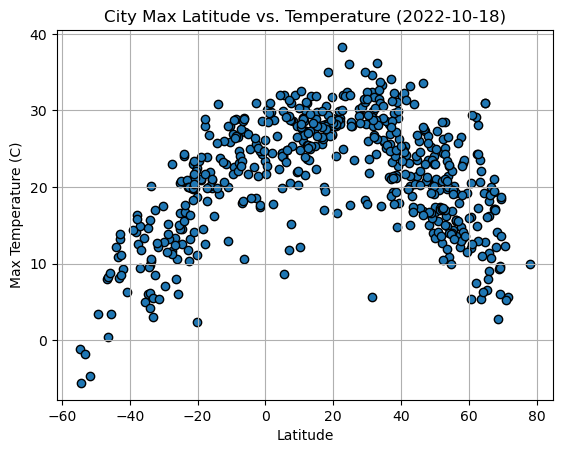

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

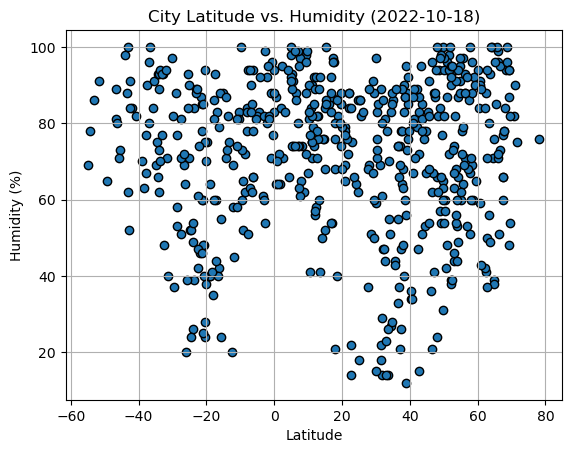

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

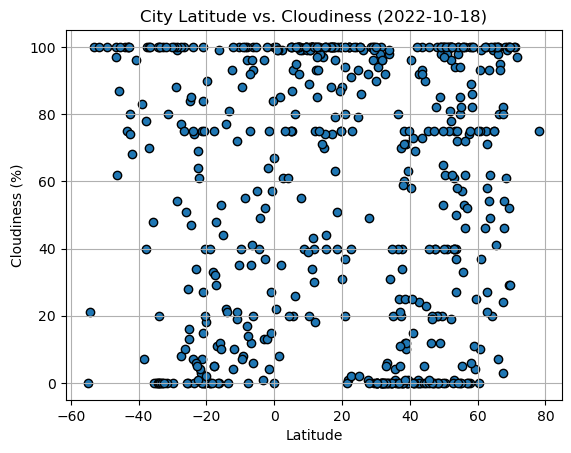

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

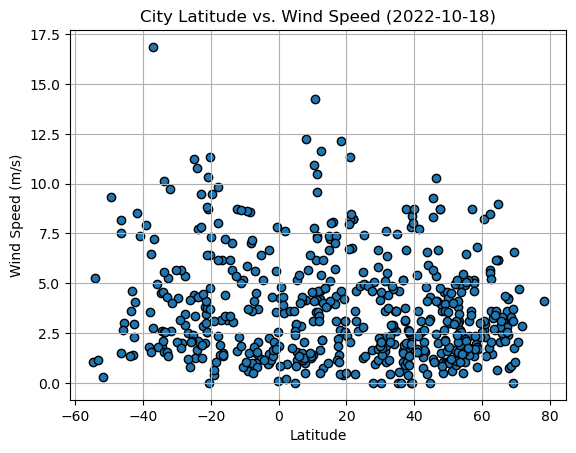

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values, line_eqn):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    r = st.pearsonr(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Set the xlabel and ylabel 
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_values.name}")
    
    #Plot scatter chart
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    line_equation = f"y = {slope: .2f}x +{intercept: .2f}"
    plt.annotate(line_equation, line_eqn, fontsize = 12, color = "red")
    
    #Print r-value
    print(f"The r-value is: {r[0]}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,longyearbyen,78.2186,15.6401,9.91,76,75,4.12,SJ,1690254872
2,san patricio,28.0170,-97.5169,30.10,69,49,5.06,US,1690254885
3,kayangel,8.0823,134.7173,28.58,74,99,4.16,PW,1690254977
4,ebaye,8.7748,167.7392,32.01,62,40,5.66,MH,1690254854
6,cabo san lucas,22.8909,-109.9124,32.01,75,75,4.63,MX,1690254758


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.88,72,55,8.60,TK,1690254896
5,blackmans bay,-43.0167,147.3167,13.18,62,100,1.41,AU,1690254876
7,flying fish cove,-10.4217,105.6791,25.82,83,100,5.14,CX,1690254864
12,west island,-12.1568,96.8225,25.99,69,100,8.75,CC,1690254867
14,puerto leguizamo,-0.1934,-74.7819,23.34,83,100,0.11,CO,1690255016


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5808335994977638


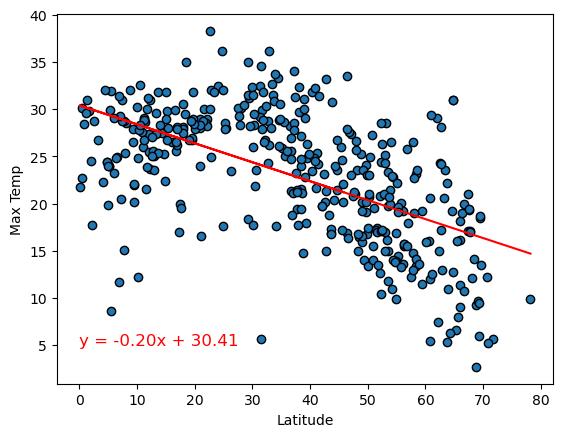

In [15]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(0,5))


The r-value is: 0.7961582369545155


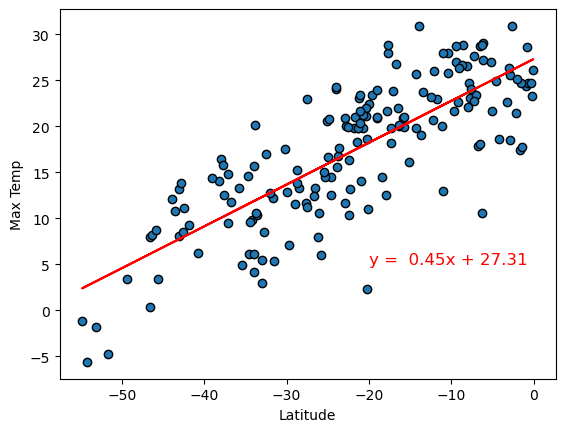

In [16]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],(-20,5))

**Discussion about the linear relationship:** 

-The Nothern Hemisphere has a negative correlation between temperature and latitude with a correlation coefficient (r) of -0.5808335994977638. 

-The Southern Hemisphere has a strong postive correlation between temperature and latitude with a correlation coefficient (r) of 0.7961582369545155

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.036058292135372705


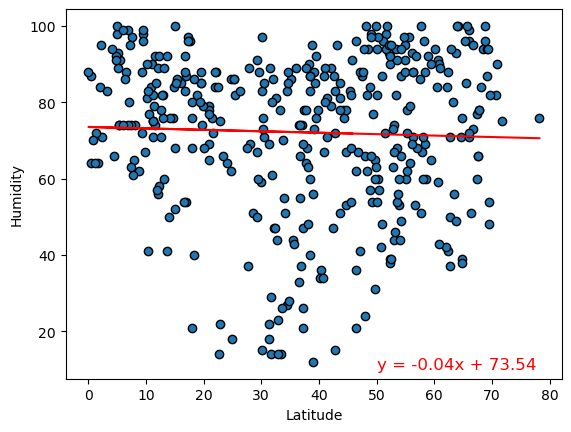

In [17]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],(50,10))

The r-value is: -0.04574717187562555


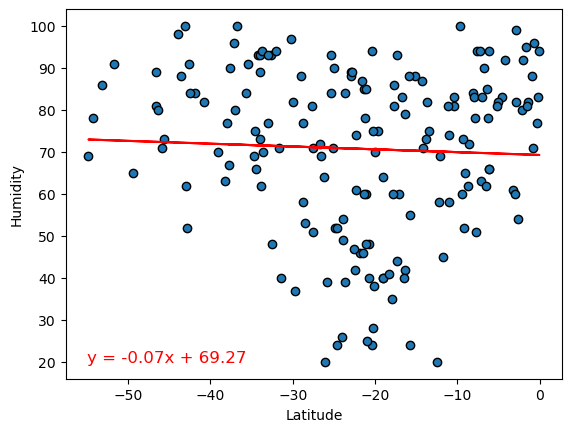

In [23]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],(-55,20))

**Discussion about the linear relationship:** 

-The Nothern Hemisphere barely has a negative correlation between humidity and latitude with a correlation coefficient (r) of -0.036058292135372705. This chart almost has no correclation between temperature and humidity. 

-The Southern Hemisphere has a extremely weak negative correlation between humidity and latitude with a correlation coefficient (r) of -0.04574717187562555

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.14809614715570052


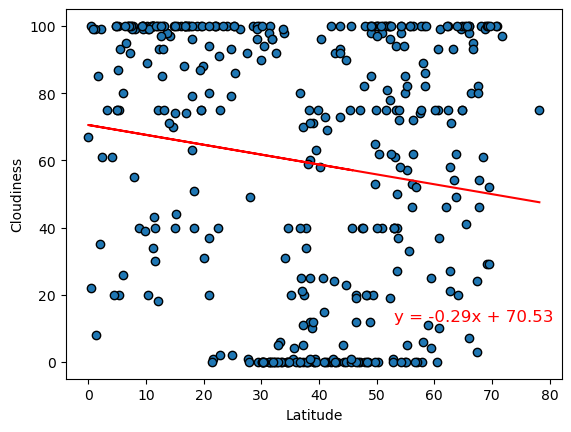

In [19]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],(53,12))

The r-value is: -0.17252154744814335


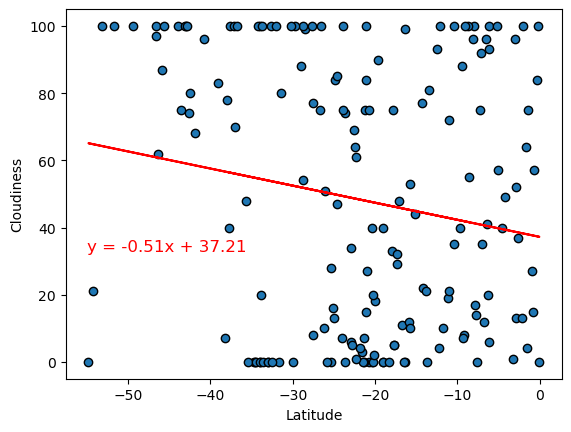

In [20]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],(-55,33))

**Discussion about the linear relationship:** 

-The Nothern Hemisphere has a weak negative correlation between cloudiness and latitude with a correlation coefficient (r) of -0.14809614715570052

-The Southern Hemisphere has a weak negative correlation between cloudiness and latitude with a correlation coefficient (r) of -0.17252154744814335

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1350680048991873


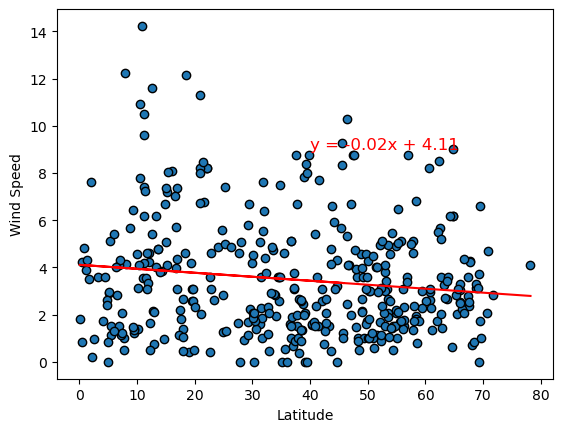

In [21]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],(40,9))

The r-value is: -0.09876871600267012


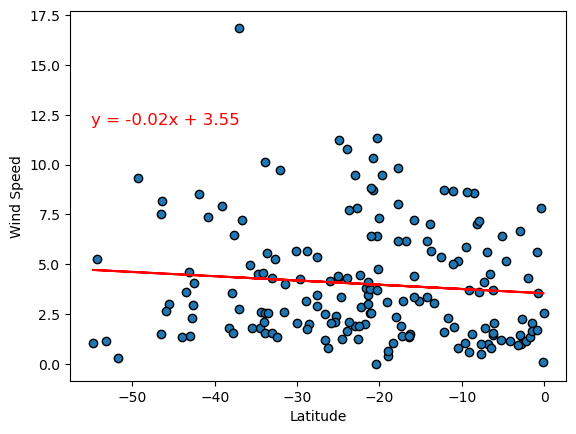

In [22]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],(-55,12))

**Discussion about the linear relationship:** 

-The Nothern Hemisphere has a weak negative correlation between wind-speed and latitude with a correlation coefficient (r) of -0.1350680048991873

-The Southern Hemisphere has a weak negative correlation between wind-speed and latitude with a correlation coefficient (r) of -0.09876871600267012